First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

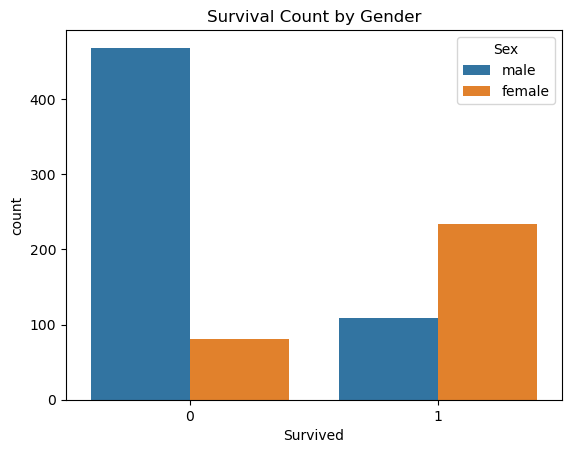

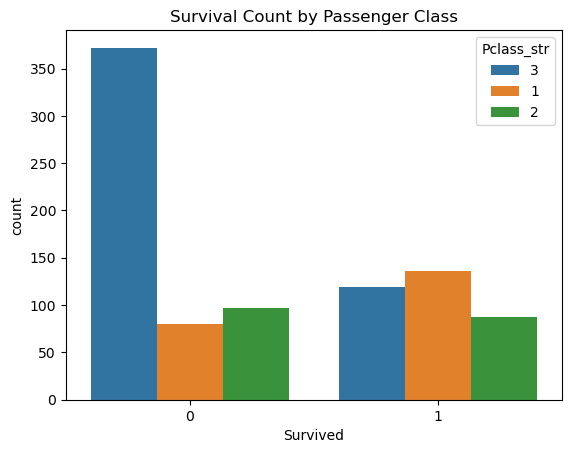


Accuracy Score: 0.8212290502793296

Confusion Matrix:
 [[92 13]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [2]:
# Titanic Survival Prediction - CODSOFT Internship Task

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the Dataset (update the path to match your file location)
df = pd.read_csv(r"C:\Users\BOOSHAN RAJ\OneDrive\Desktop\Titanic-Dataset.csv")
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Explore the Dataset
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Step 4: Data Cleaning & Preprocessing

# 4.1 Drop Unnecessary Columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 4.2 Fill Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 4.3 Encode Categorical Features
le = LabelEncoder()
# Preserve original columns for EDA visualization
df['Sex_encoded'] = le.fit_transform(df['Sex'])  # Male=1, Female=0
df['Embarked'] = le.fit_transform(df['Embarked'])

# Convert Pclass to string for plotting legend
df['Pclass_str'] = df['Pclass'].astype(str)

# Step 5: Exploratory Data Analysis (EDA)
# Use original 'Sex' column for visualization
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass_str', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

# Step 6: Build the Model

# Use the encoded column for modeling
df['Sex'] = df['Sex_encoded']
df.drop(['Sex_encoded', 'Pclass_str'], axis=1, inplace=True)

# 6.1 Prepare Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

# 6.2 Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6.3 Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
